# Get election results of Parliamentary Constituencies in 2024

Import libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

Function to retrive html data from url

In [2]:
def get_soup(url):
    response = requests.get(url)
    return BeautifulSoup(response.content, "html.parser")

Get the list of all states

In [3]:
soup = get_soup("https://results.eci.gov.in/PcResultGenJune2024/index.htm")

state_code_to_name = {}

state_options = soup.find_all("select")[0].find_all("option")
for option in state_options[1:]:
    state_code = option["value"]
    state_name = option.text.strip()
    state_code_to_name[state_code] = state_name

In [4]:
state_code_to_name

{'U01': 'Andaman & Nicobar Islands',
 'S01': 'Andhra Pradesh',
 'S02': 'Arunachal Pradesh',
 'S03': 'Assam',
 'S04': 'Bihar',
 'U02': 'Chandigarh',
 'S26': 'Chhattisgarh',
 'U03': 'Dadra & Nagar Haveli and Daman & Diu',
 'S05': 'Goa',
 'S06': 'Gujarat',
 'S07': 'Haryana',
 'S08': 'Himachal Pradesh',
 'U08': 'Jammu and Kashmir',
 'S27': 'Jharkhand',
 'S10': 'Karnataka',
 'S11': 'Kerala',
 'U09': 'Ladakh',
 'U06': 'Lakshadweep',
 'S12': 'Madhya Pradesh',
 'S13': 'Maharashtra',
 'S14': 'Manipur',
 'S15': 'Meghalaya',
 'S16': 'Mizoram',
 'S17': 'Nagaland',
 'U05': 'NCT OF Delhi',
 'S18': 'Odisha',
 'U07': 'Puducherry',
 'S19': 'Punjab',
 'S20': 'Rajasthan',
 'S21': 'Sikkim',
 'S22': 'Tamil Nadu',
 'S29': 'Telangana',
 'S23': 'Tripura',
 'S24': 'Uttar Pradesh',
 'S28': 'Uttarakhand',
 'S25': 'West Bengal'}

Get list of all constituencies

In [5]:
constituency_dict = {}
state_dict = {}

for key, val in state_code_to_name.items():
    url = f"https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-{key}.htm"
    soup = get_soup(url)

    select_element = soup.find("select", {"name": "state"})

    nconst = 0

    for option in select_element.find_all("option"):
        if option["value"] != "":
            constituency_dict[option["value"]] = ' - '.join(option.text.split(' - ')[:-1])
            nconst += 1

    state_dict[key] = {'name': val, 'nconst': nconst}

In [6]:
constituency_dict

{'U011': 'Andaman & Nicobar Islands',
 'S017': 'Amalapuram (SC)',
 'S015': 'Anakapalle',
 'S0119': 'Ananthapur',
 'S011': 'Araku (ST)',
 'S0115': 'Bapatla (SC)',
 'S0125': 'Chittoor(SC)',
 'S0110': 'Eluru',
 'S0113': 'Guntur',
 'S0120': 'Hindupur',
 'S0121': 'Kadapa',
 'S016': 'Kakinada',
 'S0118': 'Kurnoolu',
 'S0111': 'Machilipatnam',
 'S0117': 'Nandyal',
 'S019': 'Narsapuram',
 'S0114': 'Narsaraopet',
 'S0122': 'Nellore',
 'S0116': 'Ongole',
 'S018': 'Rajahmundry',
 'S0124': 'Rajampet',
 'S012': 'Srikakulam',
 'S0123': 'Thirupathi(SC)',
 'S0112': 'Vijayawada',
 'S014': 'Visakhapatnam',
 'S013': 'Vizianagaram',
 'S022': 'Arunachal East',
 'S021': 'Arunachal West',
 'S033': 'Barpeta',
 'S034': 'Darrang-Udalguri',
 'S032': 'Dhubri ',
 'S0313': 'Dibrugarh',
 'S036': 'Diphu',
 'S035': 'Guwahati',
 'S0314': 'Jorhat',
 'S037': 'Karimganj',
 'S0310': 'Kaziranga',
 'S031': 'Kokrajhar ',
 'S0312': 'Lakhimpur',
 'S039': 'Nagaon',
 'S038': 'Silchar ',
 'S0311': 'Sonitpur',
 'S049': 'Araria',
 '

In [7]:
state_dict

{'U01': {'name': 'Andaman & Nicobar Islands', 'nconst': 1},
 'S01': {'name': 'Andhra Pradesh', 'nconst': 25},
 'S02': {'name': 'Arunachal Pradesh', 'nconst': 2},
 'S03': {'name': 'Assam', 'nconst': 14},
 'S04': {'name': 'Bihar', 'nconst': 40},
 'U02': {'name': 'Chandigarh', 'nconst': 1},
 'S26': {'name': 'Chhattisgarh', 'nconst': 11},
 'U03': {'name': 'Dadra & Nagar Haveli and Daman & Diu', 'nconst': 2},
 'S05': {'name': 'Goa', 'nconst': 2},
 'S06': {'name': 'Gujarat', 'nconst': 26},
 'S07': {'name': 'Haryana', 'nconst': 10},
 'S08': {'name': 'Himachal Pradesh', 'nconst': 4},
 'U08': {'name': 'Jammu and Kashmir', 'nconst': 5},
 'S27': {'name': 'Jharkhand', 'nconst': 14},
 'S10': {'name': 'Karnataka', 'nconst': 28},
 'S11': {'name': 'Kerala', 'nconst': 20},
 'U09': {'name': 'Ladakh', 'nconst': 1},
 'U06': {'name': 'Lakshadweep', 'nconst': 1},
 'S12': {'name': 'Madhya Pradesh', 'nconst': 29},
 'S13': {'name': 'Maharashtra', 'nconst': 48},
 'S14': {'name': 'Manipur', 'nconst': 2},
 'S15':

Collect data & store to dataframe

In [8]:
from numbers import Number
data = []

sr = 1
for key, val in state_code_to_name.items():
    for i in range(state_dict[key]['nconst']):
        id = f'{key}{i+1}'
        print(f'SR: {sr:3d} ID: {id:6s} State: {val:16s} Constituency: {constituency_dict[id]}')
        sr += 1
        url = f"https://results.eci.gov.in/PcResultGenJune2024/Constituencywise{id}.htm"
        soup = get_soup(url)

        table = soup.find_all('table')[0]

        rows = table.find_all('tr')
        for row in rows:
            cols = row.find_all('td')
            cols = [ele.text.strip() for ele in cols if ele.text.strip()]
            if cols:
                cols[0] = int(cols[0]) if cols[0].isnumeric() else None # S.N.
                cols[3] = int(cols[3]) if cols[3].isnumeric() else None # EVM Votes
                cols[4] = int(cols[4]) if cols[4].isnumeric() else None # Postal Votes
                cols[5] = int(cols[5]) if cols[5].isnumeric() else None # Total Votes
                try:
                    cols[6] = float(cols[6])
                except:
                    cols[6] = None # % of Votes
                cols = [f'{id}{int(cols[0]):03d}', val, constituency_dict[id]] + cols
                data.append(cols)


SR:   1 ID: U011   State: Andaman & Nicobar Islands Constituency: Andaman & Nicobar Islands
SR:   2 ID: S011   State: Andhra Pradesh   Constituency: Araku (ST)
SR:   3 ID: S012   State: Andhra Pradesh   Constituency: Srikakulam
SR:   4 ID: S013   State: Andhra Pradesh   Constituency: Vizianagaram
SR:   5 ID: S014   State: Andhra Pradesh   Constituency: Visakhapatnam
SR:   6 ID: S015   State: Andhra Pradesh   Constituency: Anakapalle
SR:   7 ID: S016   State: Andhra Pradesh   Constituency: Kakinada
SR:   8 ID: S017   State: Andhra Pradesh   Constituency: Amalapuram (SC)
SR:   9 ID: S018   State: Andhra Pradesh   Constituency: Rajahmundry
SR:  10 ID: S019   State: Andhra Pradesh   Constituency: Narsapuram
SR:  11 ID: S0110  State: Andhra Pradesh   Constituency: Eluru
SR:  12 ID: S0111  State: Andhra Pradesh   Constituency: Machilipatnam
SR:  13 ID: S0112  State: Andhra Pradesh   Constituency: Vijayawada
SR:  14 ID: S0113  State: Andhra Pradesh   Constituency: Guntur
SR:  15 ID: S0114  St

In [9]:
headers = ['ID', 'State', 'Constituency', 'S.N.', 'Candidate', 'Party', 'EVM Votes', 'Postal Votes', 'Total Votes', '% of Votes']
df = pd.DataFrame(data[:-1], columns=headers)

In [10]:
# numeric_hd = ['EVM Votes', 'Postal Votes', 'Total Votes', '% of Votes']
# for hd in numeric_hd:
#     df[hd] = pd.to_numeric(df[hd], errors='coerce')

Add winner column

In [11]:
df['Winner'] = False

In [12]:
for key, val in constituency_dict.items():
    indx = df[df['Constituency']==val]['Total Votes'].idxmax()
    df.at[indx, 'Winner'] = True

Add margin column

In [13]:
df['Margin'] = 0

In [14]:
for key, val in constituency_dict.items():
    votes = df[df['Constituency']==val]['Total Votes'].nlargest(2).to_numpy()
    if len(votes) > 1:
        for row in df[df['Constituency']==val].index:
            df.at[row, 'Margin'] = df[df['Constituency']==val]['Total Votes'][row] - votes[0]
        indx = df[df['Constituency']==val]['Total Votes'].idxmax()
        df.at[indx, 'Margin'] = votes[0] - votes[1]

In [15]:
df

,ID,State,Constituency,S.N.,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Winner,Margin
0.0,U011001,Andaman & Nicobar Islands,Andaman & Nicobar Islands,1.0,BISHNU PADA RAY,Bharatiya Janata Party,102182.0,254.0,102436.0,50.58,True,24396
1.0,U011002,Andaman & Nicobar Islands,Andaman & Nicobar Islands,2.0,KULDEEP RAI SHARMA,Indian National Congress,77829.0,211.0,78040.0,38.54,False,-24396
2.0,U011003,Andaman & Nicobar Islands,Andaman & Nicobar Islands,3.0,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236.0,18.0,8254.0,4.08,False,-94182
3.0,U011004,Andaman & Nicobar Islands,Andaman & Nicobar Islands,4.0,D AYYAPPAN,Communist Party of India (Marxist),6009.0,8.0,6017.0,2.97,False,-96419
4.0,U011005,Andaman & Nicobar Islands,Andaman & Nicobar Islands,5.0,V.K. ABDUL AZIZ,Independent,2195.0,8.0,2203.0,1.09,False,-100233
...,...,...,...,...,...,...,...,...,...,...,...,...
8897.0,S2542009,West Bengal,Birbhum,9.0,ABDUL IMRAN,Independent,3823.0,9.0,3832.0,0.25,False,-714129
8898.0,S2542010,West Bengal,Birbhum,10.0,BISWAJIT MISHRA,All India Arya Mahasabha,3806.0,17.0,3823.0,0.25,False,-714138
8899.0,S2542011,West Bengal,Birbhum,11.0,MD. JAKIR HOSSAIN,Bharatiya National Janata Dal,2547.0,10.0,2557.0,0.17,False,-715404
8900.0,S2542012,West Bengal,Birbhum,12.0,DOLA SARKAR,Indian National Socialistic Action Forces,2027.0,6.0,2033.0,0.13,False,-715928


Save data to CSV file

In [16]:
df.to_csv('election_results_2024.csv')

Results of INDORE constituency

In [17]:
df[df['Constituency']=='INDORE']

,ID,State,Constituency,S.N.,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Winner,Margin
3494.0,S1226001,Madhya Pradesh,INDORE,1.0,SHANKAR LALWANI,Bharatiya Janata Party,1223746.0,3005.0,1226751.0,78.54,True,1008077
3495.0,S1226002,Madhya Pradesh,INDORE,2.0,SANJAY S/O LAKSHMAN SOLANKI,Bahujan Samaj Party,51486.0,173.0,51659.0,3.31,False,-1175092
3496.0,S1226003,Madhya Pradesh,INDORE,3.0,PAWAN KUMAR,Akhil Bhartiya Parivar Party,15182.0,28.0,15210.0,0.97,False,-1211541
3497.0,S1226004,Madhya Pradesh,INDORE,4.0,ABHAY JAIN,Independent,8379.0,13.0,8392.0,0.54,False,-1218359
3498.0,S1226005,Madhya Pradesh,INDORE,5.0,LAVISH DILIP KHANDELWAL,Independent,8231.0,7.0,8238.0,0.53,False,-1218513
3499.0,S1226006,Madhya Pradesh,INDORE,6.0,COMRADE AJEET SINGH,Socialist Unity Centre Of India (COMMUNIST),7148.0,31.0,7179.0,0.46,False,-1219572
3500.0,S1226007,Madhya Pradesh,INDORE,7.0,AYAZ ALI,Independent,7074.0,22.0,7096.0,0.45,False,-1219655
3501.0,S1226008,Madhya Pradesh,INDORE,8.0,ENG. ARJUN PARIHAR,Independent,3823.0,8.0,3831.0,0.25,False,-1222920
3502.0,S1226009,Madhya Pradesh,INDORE,9.0,BASANT GEHLOT,Jan Sangh Party,3663.0,13.0,3676.0,0.24,False,-1223075
3503.0,S1226010,Madhya Pradesh,INDORE,10.0,RAVI SIRWAIYA,Independent,2615.0,6.0,2621.0,0.17,False,-1224130


Vote percentages

In [18]:
total_votes = df['Total Votes'].sum()
total_votes


645349352.0

In [19]:
bjp_votes = df[df['Party']=='Bharatiya Janata Party']['Total Votes'].sum()
bjp_votes/total_votes

0.3656530130055821

In [20]:
inc_votes = df[df['Party']=='Indian National Congress']['Total Votes'].sum()
inc_votes/total_votes

0.21191477697493682

Results in a state

In [28]:
df_wb = df[df['State'] == 'West Bengal']
total_votes = df_wb['Total Votes'].sum()
bjp_votes = df_wb[df_wb['Party']=='Bharatiya Janata Party']['Total Votes'].sum()
tmc_votes = df_wb[df_wb['Party']=='All India Trinamool Congress']['Total Votes'].sum()
inc_votes = df_wb[df_wb['Party']=='Indian National Congress']['Total Votes'].sum()
cpm_votes = df_wb[df_wb['Party'].isin(['Communist Party of India',
                                       'Communist Party of India  (Marxist)',
                                       'All India Forward Bloc',
                                       'Revolutionary Socialist Party',])]['Total Votes'].sum()
vote_pc = {
    'tmc': tmc_votes/total_votes*100.,
    'bjp': bjp_votes/total_votes*100.,
    'inc': inc_votes/total_votes*100.,
    'cpm': cpm_votes/total_votes*100.,
    'other': (total_votes - (bjp_votes + tmc_votes + cpm_votes + inc_votes))/total_votes*100.,
}
vote_pc

{'tmc': 45.765369286256494,
 'bjp': 38.74853368454897,
 'inc': 4.675167820706718,
 'cpm': 6.357826712049695,
 'other': 4.453102496438127}

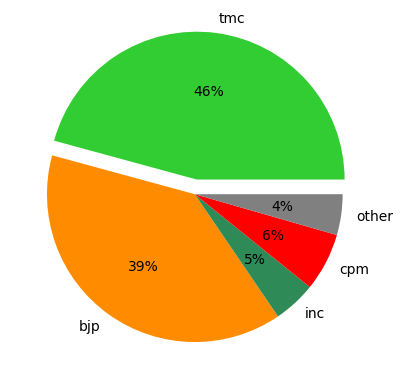

In [31]:
import matplotlib.pyplot as plt
import seaborn

palette_color = ['limegreen', 'darkorange', 'seagreen', 'red', 'grey'] #seaborn.color_palette('dark')
explode = [0.1, 0, 0, 0, 0]
plt.pie(vote_pc.values(), labels=vote_pc.keys(),
        colors=palette_color, explode=explode, autopct='%.0f%%')
plt.show()

In [23]:
df_wb

,ID,State,Constituency,S.N.,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Winner,Margin
8353.0,S251001,West Bengal,Coochbehar,1.0,JAGADISH CHANDRA BARMA BASUNIA,All India Trinamool Congress,785747.0,2628.0,788375.0,48.57,True,39250
8354.0,S251002,West Bengal,Coochbehar,2.0,NISITH PRAMANIK,Bharatiya Janata Party,745144.0,3981.0,749125.0,46.16,False,-39250
8355.0,S251003,West Bengal,Coochbehar,3.0,NITISH CHANDRA ROY,All India Forward Bloc,29992.0,275.0,30267.0,1.86,False,-758108
8356.0,S251004,West Bengal,Coochbehar,4.0,PIYA ROY CHOWDHURY,Indian National Congress,10539.0,140.0,10679.0,0.66,False,-777696
8357.0,S251005,West Bengal,Coochbehar,5.0,HAREKRISHNA SARKAR,Independent,9462.0,5.0,9467.0,0.58,False,-778908
...,...,...,...,...,...,...,...,...,...,...,...,...
8896.0,S2542008,West Bengal,Birbhum,8.0,SAURAV MUDI,Independent,4249.0,7.0,4256.0,0.28,False,-713705
8897.0,S2542009,West Bengal,Birbhum,9.0,ABDUL IMRAN,Independent,3823.0,9.0,3832.0,0.25,False,-714129
8898.0,S2542010,West Bengal,Birbhum,10.0,BISWAJIT MISHRA,All India Arya Mahasabha,3806.0,17.0,3823.0,0.25,False,-714138
8899.0,S2542011,West Bengal,Birbhum,11.0,MD. JAKIR HOSSAIN,Bharatiya National Janata Dal,2547.0,10.0,2557.0,0.17,False,-715404


Party wise data

In [24]:
df_wb_party = df_wb.groupby('Party').sum()
df_wb_party.index

Index(['All India Arya Mahasabha', 'All India Forward Bloc',
       'All India Secular Front', 'All India Trinamool Congress',
       'Ambedkarite Party of India', 'Bahujan Maha Party',
       'Bahujan Samaj Party', 'Bharatheeya Jawan Kisan Party',
       'Bharatiya Janata Party', 'Bharatiya National Janata Dal',
       'Bharatiya Nyay-Adhikar Raksha Party',
       'Bhartiya Lokmat Rashtrwadi Party', 'Bhumiputra United Party',
       'Communist Party of India', 'Communist Party of India  (Marxist)',
       'Communist Party of India  (Marxist-Leninist)  (Liberation)',
       'Democratic Socialist Party of India', 'Gana Suraksha Party',
       'Gorkha Rashtriya Congress', 'Guruchand Sena Dal',
       'Hindustan Shakti Sena', 'Independent', 'India Manus Party',
       'Indian National Congress', 'Indian National Socialistic Action Forces',
       'Indian Unity Centre', 'Jai Prakash Janata Dal',
       'Jamat-E-Seratul Mustakim', 'Jan Sangh Party',
       'Jharkhand People's Party', 'Kamat

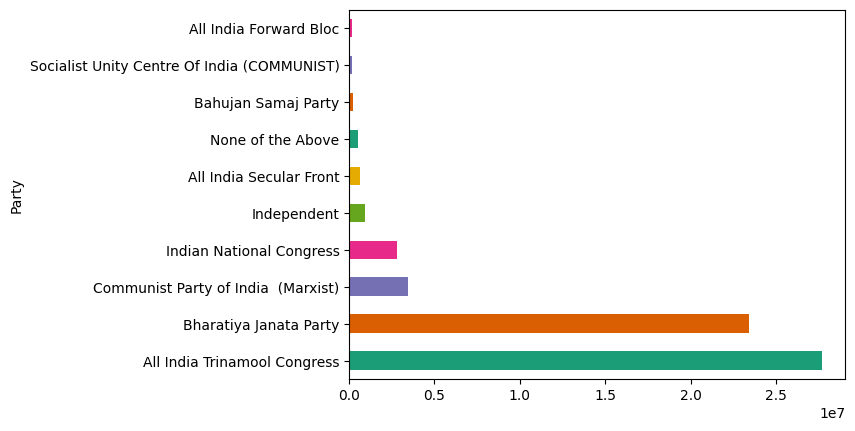

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns

df_wb_party['Total Votes'].nlargest(10).plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.show()

In [26]:
win = pd.to_numeric(df_wb_party['Winner'])[df_wb_party['Winner']>0]
win

Party
All India Trinamool Congress    29
Bharatiya Janata Party          12
Indian National Congress         1
Name: Winner, dtype: int64

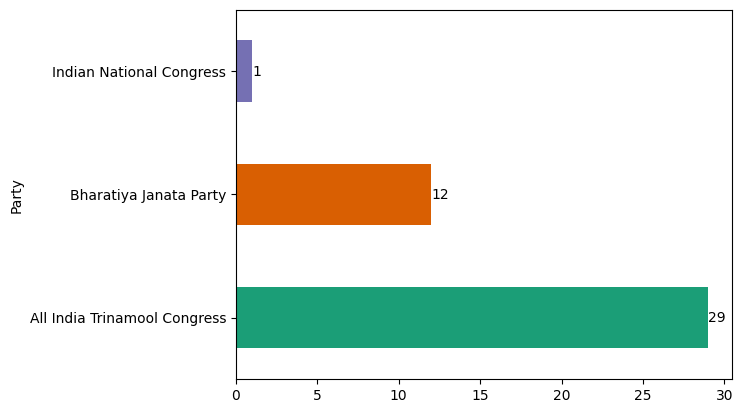

In [27]:
ax = win.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
for container in ax.containers:
    ax.bar_label(container)
plt.show()